## PW 2: Prolog with python (Group 1 3ING)
<font size="5" color="red">No AI tools allowed! 🤖⛔  

### Exercise 1

The family tree structure is shown as follows:

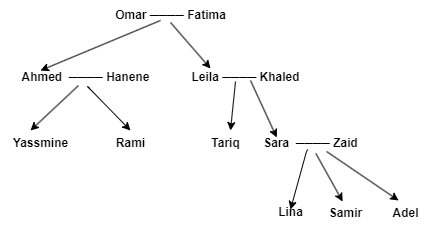

The following predicates are used to define the **facts base**:

- `male(X)` for males.
- `female(X)` for females.
- `parent(X, Y)` for X is the parent of Y.
- `wife(X, Y)` for X is the wife of Y.

#### Questions
1. Define the facts
2. Define the predicate `sibling(X, Y)` which specifies that X and Y are siblings.
3. Define the predicate `cousin(X, Y)` to specify that X and Y are cousins.
4. Define the predicate `uncle(X, Y)`(عم / خال) to specify that X is the uncle of Y, and the predicate `aunt(X, Y)`(عمة / خالة).
5. Define the predicate `niece(X, Y)`(ابنة الأخ أو ابنة الأخت)  to specify that X is the niece of Y, and the predicate `nephew(X, Y)` (ابن الأخ أو ابن الأخت).
6. Define the predicate `ancestor_of(X, Y)` (السلف هو الشخص الذي ينحدر منه فرد آخر عبر الأجيال) to specify that X is an ancestor of Y.


In [ ]:
#define facts and rules
# The Pytholog code for defining this knowledge base is shown below:
import pytholog as pl

# Create a new knowledge base named 'family'
family_kb = pl.KnowledgeBase("family")

# Add facts about family relationships
family_kb([
    
    # @ FACTS
    
    # ? male female
    "male(omar)",
    "male(khaled)",
    "male(ahmed)",
    "male(rami)",
    "male(tariq)",
    "male(zaid)",
    "male(adel)",
    "male(samir)",
    
    "female(fatima)",
    "female(hanene)",
    "female(leila)",
    "female(sara)",
    "female(yassmine)",
    "female(lina)",
    
    
    # ? parent
    # o/f ===================
    "parent(omar,ahmed)",
    "parent(omar,leila)",
    
    "parent(fatima,ahmed)",
    "parent(fatima,leila)",
    # a/h =============
    "parent(ahmed,rami)",
    "parent(ahmed,yassmine)",
    "parent(hanene,rami)",
    "parent(hanene,yassmine)",

    # k/l =============
    "parent(khaled,tariq)",
    "parent(khaled,sara)",
    
    "parent(leila,tariq)",
    "parent(leila,sara)",
    
    # s/z ===================
    "parent(zaid,lina)",
    "parent(zaid,samir)",
    "parent(zaid,adel)",
    
    "parent(sara,lina)",
    "parent(sara,samir)",
    "parent(sara,adel)",
    
    
    # ? wife
    
    "wife(fatima,omar)",
    "wife(hanene,ahmed)",
    "wife(leila,khaled)",
    "wife(sara,zaid)",
    
    # @ RULES
    
    "siblings(X,Y) :-  parent(Z,X), parent(Z,Y) , neq(X,Y) ",
    
    "uncle(X,Y) :- male(X) , parent(Z,Y), siblings(X,Z) ",
    "aunt(X,Y) :- female(X) , parent(Z,Y), siblings(X,Z) ",
    
    "cousin(X,Y) :- uncle(Z,X) , parent(Z,Y)",
    "cousin(X,Y) :- aunt(Z,X) , parent(Z,Y)",
    "cousin(X,Y) :- cousin(Y,X)",
    
    
    "nieces(X,Y) :- aunt(Y,X) ",
    "nieces(X,Y) :- uncle(Y,X) ",
    "nephew(X,Y) :- nieces(X,Y)",
    
    "ancestor_of(X,Y) :- parent(X,Y) ",
    "ancestor_of(X,Y) :- parent(X,Z), ancestor_of(Z,Y) ",
    
    
])


Answer with Prolog the following questions: 
   1. Is Ahmed the ancestor of Lina?
   2. Who are the siblings of Leila?
   3. Is Yassmine the niece of Sara? 
   4. List all ancestors of Adel.
   5. Find all nephews of Hanene.

In [18]:
# answer the questions
# print(family_kb.query(pl.Expr('ancestor_of(ahmed, lina)'))) # false
# print(family_kb.query(pl.Expr('siblings(lina,X)'))) # false
# print(family_kb.query(pl.Expr('nieces(yassmine,sara)'))) # false
print(family_kb.query(pl.Expr('ancestor_of(X, adel)'))) # false

['No']



### Exercise 2

Define a **knowledge base** for the following statements:

- The **cow** is a **herbivorous** animal. (البقرة حيوان عاشب)
- The **parrot** is an **intelligent** animal. (الببغاء حيوان ذكي)
- The **fox** is a **cunning** animal. (الثعلب حيوان ماكر )
- Every **cunning** animal is **omnivorous**. (كل حيوان ماكر هو قارت)
- An **omnivorous** animal **eats** both **plants** and **meat**. (الحيوان القارت يأكل النباتات واللحم)
- **Omnivorous** can **eats** any **herbivorous** (الحيوان القارت يمكنه أن يأكل أي حيوان عاشب)
- An **intelligent** animal can **learn behaviors**. (الحيوان الذكي يمكنه تعلم السلوكيات)
- Both **omnivores** and **herbivores** **need sunlight** for energy. (كل من القوارت والعواشب يحتاجون لأشعة الشمس للطاقة)
- An animal is considered a **strong survivor** if it is both **carnivorous** and **cunning**. (يُعتبر الحيوان قوي البقاء إذا كان كلاً من لاحم وماكر)

In [37]:
# Initialize the knowledge base
animal_kb = pl.KnowledgeBase("animal")

# Add facts about animal relationships
animal_kb([
    "herbivorous(cow)",
    "intelligent(parrot)",
    "cunning(fox)",
    
    "omnivorous(X) :- cunning(X)",
    "eat(X,meat) :- omnivorous(X)",
    "eat(X,plants) :- omnivorous(X)",
    
    # "omnivorous(X) :- eat(X,meat) , eat(X,plants)",
    "omnivorous(X) :- herbivorous(Y), eat(X,Y) ",
    
    "learn_b(X) :- intelligent(X) ",
    "need_sun(X) :- herbivorous(X) ",
    "need_sun(X) :- omnivorous(X) ",
    
    "stron_survivor(X) :- eat(X,meat) , cunning(X)  ",
])


**Answer with Prolog this question**: Is there any animal that can eat plants?

In [38]:
# answer the question
print(animal_kb.query(pl.Expr('eat(_, plants)')))

['Yes']


**Answer with Prolog this question**: What types of food does the fox eat?

In [39]:
# answer the question
print(animal_kb.query(pl.Expr('eat(fox,X)')))

[{'X': 'meat'}, {'X': 'plants'}]


### Exercise 3 (Optional) 

#### Plant Care Diagnostic System


This exercise is designed to simulate a simple expert system to help plant enthusiasts **diagnose common plant health issues based on symptoms and provide care recommendations**.

You will **choose the symptoms observed in your plant by entering the numbers corresponding to each symptom from a menu**. Based on the symptoms you select, the system will analyze them to provide a possible diagnosis and a recommended care solution.

The expert system uses a set of rules to make a diagnosis based on combinations of symptoms. Here’s a **list of possible symptoms and how they are interpreted in the system**: **wilting (ذبول), yellow_leaves (أوراق صفراء), brown_spots (بقع بنية), drooping (تدلي), mold (عفن), slow_growth (بطء النمو), leaf_drop (تساقط الأوراق), weak_stems (سيقان ضعيفة)**.

Diagnostic Rules
The system uses the following rules to diagnose conditions based on combinations of symptoms:


<table>
  <tr>
    <th>Diagnosis (التشخيص)</th>
    <th>Symptoms</th>
    <th>Care Recommendation (التوصية بالرعاية)</th>
  </tr>
  <tr>
    <td>Overwatering (إفراط في الري)</td>
    <td>wilting, yellow_leaves</td>
    <td>Reduce watering frequency and ensure proper drainage. (قلل من تكرار الري وتأكد من التصريف الجيد)</td>
  </tr>
  <tr>
    <td>Fungal Infection (عدوى فطرية)</td>
    <td>brown_spots, mold</td>
    <td>Remove affected leaves and apply a fungicide. (قم بإزالة الأوراق المصابة وضع مبيداً فطرياً)</td>
  </tr>
  <tr>
    <td>Nutrient Deficiency (نقص المغذيات)</td>
    <td>yellow_leaves, slow_growth</td>
    <td>Add balanced fertilizer and monitor growth. (أضف سمادًا متوازنًا وتابع النمو)</td>
  </tr>
  <tr>
    <td>Insufficient Light (نقص الضوء)</td>
    <td>weak_stems, slow_growth</td>
    <td>Move plant to a brighter location. (انقل النبات إلى مكان أكثر إضاءة)</td>
  </tr>
  <tr>
    <td>Underwatering (نقص في الري)</td>
    <td>drooping, leaf_drop</td>
    <td>Increase watering frequency and check soil moisture. (زد من تكرار الري وتحقق من رطوبة التربة)</td>
  </tr>
</table>




In [ ]:
plants_kb = pl.KnowledgeBase("plants")

# Add facts about plants relationships
plants_kb([
    "drooping(plant_a)",
    "leaf_drop(plant_a)",
    
    "mold(plant_b)",
    "brown_spot(plant_b)",
    
    "wilting(plant_c)",
    "yellow_leavs(plant_c)",
    
    "yellow_leavs(plant_d)",
    
    "overwatering(X) :- wilting(X), yellow_leavs(X)",
    "fungal_infection(X) :- brown_spot(X), mold(X)",
    "nutrient_deficiency (X) :- slow_growth(X), yellow_leavs(X)",
    "insufficient_light (X) :- weak_stems(X), slow_growth(X)",
    "underwatering(X) :- drooping(X), leaf_drop(X)",
])

In [ ]:
print(plants_kb.query(pl.Expr('overwatering(X)')))
print(plants_kb.query(pl.Expr('fungal_infection(X)')))
print(plants_kb.query(pl.Expr('nutrient_deficiency(X)')))
print(plants_kb.query(pl.Expr('insufficient_light(X)')))
print(plants_kb.query(pl.Expr('underwatering(X)')))

[{'X': 'plant_c'}]
[{'X': 'plant_b'}]
['No']
['No']
[{'X': 'plant_a'}]


In [51]:

rules = [   
    "overwatering(X) :- wilting(X), yellow_leavs(X)",
    "fungal_infection(X) :- brown_spot(X), mold(X)",
    "nutrient_deficiency (X) :- slow_growth(X), yellow_leavs(X)",
    "insufficient_light (X) :- weak_stems(X), slow_growth(X)",
    "underwatering(X) :- drooping(X), leaf_drop(X)",
]

i_list = ["wilting","yellow_leavs"]
x= str(input("isues : "))

x = x.split(" ")

for a in range(len(x)):
    x[a] = f"{x[a]}(myplant)"

rules.extend(x)

plants_kb = pl.KnowledgeBase("plants")

plants_kb(rules)


print(plants_kb.query(pl.Expr('overwatering(X)')))
print(plants_kb.query(pl.Expr('fungal_infection(X)')))
print(plants_kb.query(pl.Expr('nutrient_deficiency(X)')))
print(plants_kb.query(pl.Expr('insufficient_light(X)')))
print(plants_kb.query(pl.Expr('underwatering(X)')))

[{'X': 'myplant'}]
['No']
['No']
['No']
['No']
